# **Importing the Data Set**

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
conn = sqlite3.connect("password_data.sqlite")

df = pd.read_sql_query("SELECT * FROM Users", conn)

df.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [6]:
df["strength"].unique()

array([1, 2, 0], dtype=int64)

In [7]:
df.shape

(100000, 3)

# **Data Cleaning**

In [8]:
df.drop(["index"] , axis=1 , inplace=True)

In [9]:
df.columns


Index(['password', 'strength'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().any()

password    False
strength    False
dtype: bool

**Finding Data Types**

In [12]:
df.dtypes

password    object
strength     int64
dtype: object

**Gathering Information about dependent Variable Strength**

In [13]:
df["strength"].unique()

array([1, 2, 0], dtype=int64)

In [14]:
df["strength"].value_counts()

1    73883
0    13622
2    12495
Name: strength, dtype: int64

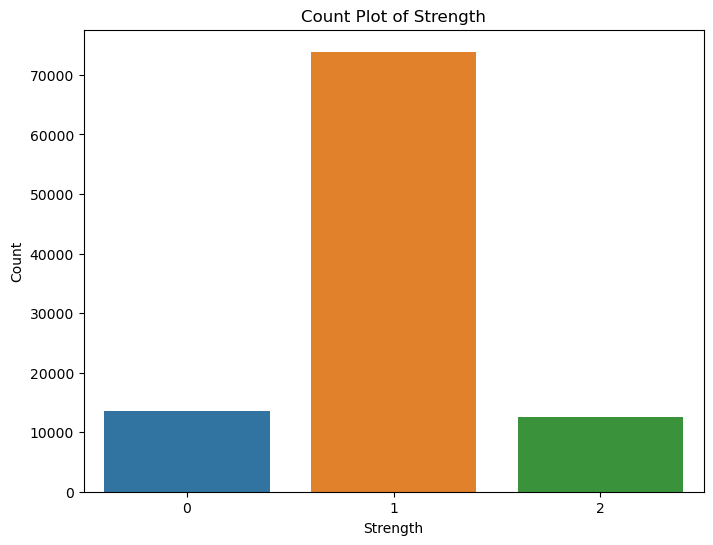

In [15]:
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.countplot(data=df, x='strength')  # Change 'x' to the column you want to plot
plt.title('Count Plot of Strength')   # Optional: Set the title
plt.xlabel('Strength')                  # Optional: Label for x-axis
plt.ylabel('Count')                     # Optional: Label for y-axis
plt.show()

# **Performing Semantic Analysis**

*   Passwords with only numeric characters: Identifies passwords consisting solely of numbers, typically indicating weak security.

*   Passwords with only uppercase characters: Indicates passwords formed exclusively of uppercase letters, which might lack complexity if no other character types are used.

*   Passwords with only alphabetic characters: Highlights passwords that use only letters (either uppercase or lowercase), lacking numbers or special characters, which can reduce password strength.

*   Passwords with alphanumeric characters: Recognizes passwords containing a combination of letters and numbers, a commonly recommended practice for moderate security.

*   Passwords with title-case characters: Detects passwords where each word or section starts with an uppercase letter, similar to titles (e.g., "HelloWorld"). This can add uniqueness, but still may be predictable.

*   Passwords with special characters: Points out passwords containing special characters (e.g., !, @, #), which enhances security by increasing password complexity.








**Password with only Numeric Character**

In [16]:
numeric_only = df['password'].str.isdigit().sum()
print(f"Number of passwords with only numeric characters: {numeric_only}")

Number of passwords with only numeric characters: 26


In [17]:
df[df['password'].str.isdigit()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


**Password with only Uppercase Alphabets Character**

In [18]:
uppercase = df['password'].str.isupper().sum()
print(f"Number of passwords with only uppercase characters: {uppercase}")

Number of passwords with only uppercase characters: 1506


In [19]:
df[df["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [20]:
df[df["password"].str.isupper()].shape

(1506, 2)

**Password with only Alphabet Characters**

In [21]:
alphabet_chr = df["password"].str.isalpha().sum()
print(f"Number of passwords with only alphabet characters: {alphabet_chr}")

Number of passwords with only alphabet characters: 50


In [22]:
df[df["password"].str.isalpha()].shape

(50, 2)

**Password with Alphanumeric Character**

In [23]:
alphanumeric_chr = df["password"].str.isalnum().sum()
print(f"Number of passwords with alphanumeric characters: {alphanumeric_chr}")

Number of passwords with alphanumeric characters: 97203


In [24]:
df[df["password"].str.isalnum()].shape

(97203, 2)

**Password with title Case Words**

In [25]:
titlecase_chr = df["password"].str.istitle().sum()
print(f"Number of passwords with title-case characters: {titlecase_chr}")

Number of passwords with title-case characters: 932


In [26]:
df[df["password"].str.istitle()].shape

(932, 2)

**Password with unique characters**

In [27]:
unique_chr = df['password'].str.contains(r'[^a-zA-Z0-9]').sum()
print(f"Number of passwords with unique characters: {unique_chr}")

Number of passwords with unique characters: 2811


In [28]:
df[df['password'].str.contains(r'[^a-zA-Z0-9]')]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# Feature Engineering
Strength of Passwords depends upon:

*   Length of password
*   Frequency of Lowercase Characters
*   Frequency of Uppercase Characters
*   Frequency of Numeric Characters
*   Frequency of Special Characters(Randomness)

####Length of password

In [29]:
df["length"] = df["password"].str.len()

In [30]:
df.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


####Frequency of Lowercase Characters

In [31]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [32]:
df["LowerCase Freq"] = np.round(df["password"].apply(freq_lowercase),3)

In [33]:
df.head()

,password,strength,length,LowerCase Freq
0,zxe870819,1,9,0.333
1,xw46454nr23l,1,12,0.417
2,soporte13,1,9,0.778
3,accounts6000webhost.com,2,23,0.783
4,c443balg,1,8,0.625


#### Frequency of Upper Case Characters

In [34]:
def uppercase_freq(row):
    return len([char for char in row if char.isupper()])/len(row)

In [35]:
df["UpperCase Freq"] = np.round(df["password"].apply(uppercase_freq),3)

In [36]:
df.head()

,password,strength,length,LowerCase Freq,UpperCase Freq
0,zxe870819,1,9,0.333,0.0
1,xw46454nr23l,1,12,0.417,0.0
2,soporte13,1,9,0.778,0.0
3,accounts6000webhost.com,2,23,0.783,0.0
4,c443balg,1,8,0.625,0.0


#### Frequency of Numeric Characters

In [37]:
def numeric_freq(row):
    return len([char for char in row if char.isnumeric()])/len(row)

In [38]:
df["Numeric Freq"] = np.round(df["password"].apply(numeric_freq),3)

#### Frequency of Special Characters

In [39]:
import re

def special_freq(row):
    # Count the special characters and divide by total length
    special_chars = len([char for char in row if re.match(r'[^a-zA-Z0-9]', char)])
    return special_chars / len(row)


In [40]:
df["Special Freq"] = np.round(df["password"].apply(special_freq),3)

In [41]:
df.head()

,password,strength,length,LowerCase Freq,UpperCase Freq,Numeric Freq,Special Freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


# Performing Descriptive Statistics

In [42]:
cols = ['length', 'LowerCase Freq', 'UpperCase Freq',
       'Numeric Freq', 'Special Freq']

for col in cols:
    print(col)
    print(df[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


LowerCase Freq
         LowerCase Freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


UpperCase Freq
         UpperCase Freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


Numeric Freq
         Numeric Freq                        
                  min    max      mean median
strength                                  

#### Key Findings


*   Stronger passwords (Strength 2) tend to be significantly longer, while weaker passwords (Strength 0) are generally shorter.
*   Lowercase letters are heavily used in weaker passwords, whereas stronger passwords (Strength 2) balance lowercase letters with other character types.
*   Strong passwords tend to have more uppercase letters, which adds complexity and improves strength.
*   Weaker passwords (0 and 1) often use numbers to compensate for simplicity, while stronger passwords use numerics sparingly, emphasizing a more balanced character mix.
*   While special characters are rare in general, their slightly higher usage in strong passwords (Strength 2) indicates they can add valuable complexity when used.





#### Box Plot for Visualization

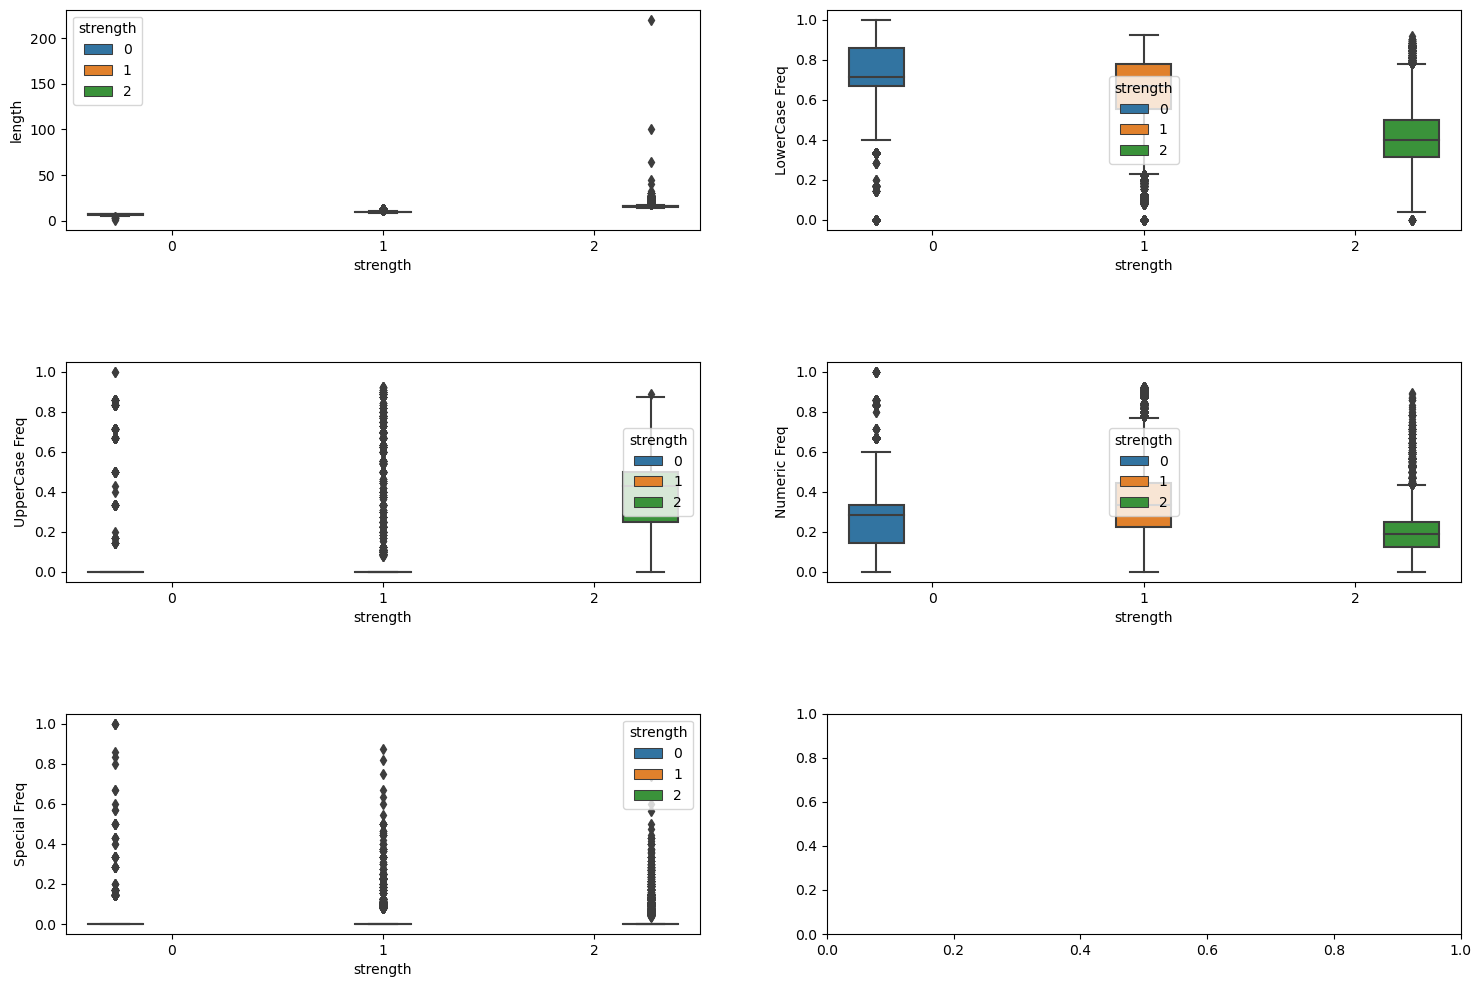

In [43]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(18,12))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=df)
sns.boxplot(x="strength" , y='LowerCase Freq' , hue="strength" , ax=ax2, data=df)
sns.boxplot(x="strength" , y='UpperCase Freq' , hue="strength" , ax=ax3, data=df)
sns.boxplot(x="strength" , y='Numeric Freq' , hue="strength" , ax=ax4, data=df)
sns.boxplot(x="strength" , y='Special Freq' , hue="strength" , ax=ax5, data=df)
plt.subplots_adjust(hspace=0.6)

#### Finding after using BoxPlot



*   Lowercase Frequency and Password Strength:

Lowercase letters are more common in low-strength passwords. For high-strength passwords, lowercase letters can also have a high frequency, but this often relates to the password’s overall length.


*   Digit Frequency (Numeric Frequency):

There’s a split in digit frequency across passwords of different strengths. Medium-strength (1) and high-strength (2) passwords show some distinct characteristics, while low-strength (0) and medium-strength (1) passwords overlap, offering limited insights.


Medium- to high-strength passwords have digits distributed proportionately, suggesting that a well-balanced password is often stronger. Low-strength passwords often lack this balance, making them easier to compromise.

*   Uppercase Frequency:

While there’s a trend showing that uppercase letters contribute to strength, this trend isn’t as strong as that for length or lowercase letters.

Adding uppercase letters does make a password stronger, but on its own, it doesn’t contribute as significantly as a balanced mix of character types or a longer length. So, uppercase letters help, but they aren’t a sole determinant of strength.


*   Special Character Frequency:

The presence of special characters tends to indicate higher-strength passwords, and this trend is more pronounced than that of uppercase letters.


Special characters make passwords harder to guess and more complex, which is why high-strength passwords often include them. This reinforces the importance of diversity in character types.



*   Final Findings:

Higher-strength passwords typically include a mix of character types—lowercase, uppercase, numeric, and special characters. This diversity increases the range and spread seen in the boxplots, showing that these passwords are not limited to a few simple character types.










# Feature  Importance

In [44]:


def get_dist(df, feature):
    plt.figure(figsize=(10, 8))

    # Violin plot
    plt.subplot(1, 2, 1)
    sns.violinplot(x='strength', y=feature, data=df)

    # KDE plot with labels
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[df['strength'] == 0][feature], color="red", label="0")
    sns.kdeplot(df[df['strength'] == 1][feature], color="blue", label="1")
    sns.kdeplot(df[df['strength'] == 2][feature], color="orange", label="2")

    plt.legend()
    plt.show()



In [45]:
df.columns

Index(['password', 'strength', 'length', 'LowerCase Freq', 'UpperCase Freq',
       'Numeric Freq', 'Special Freq'],
      dtype='object')

In [46]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

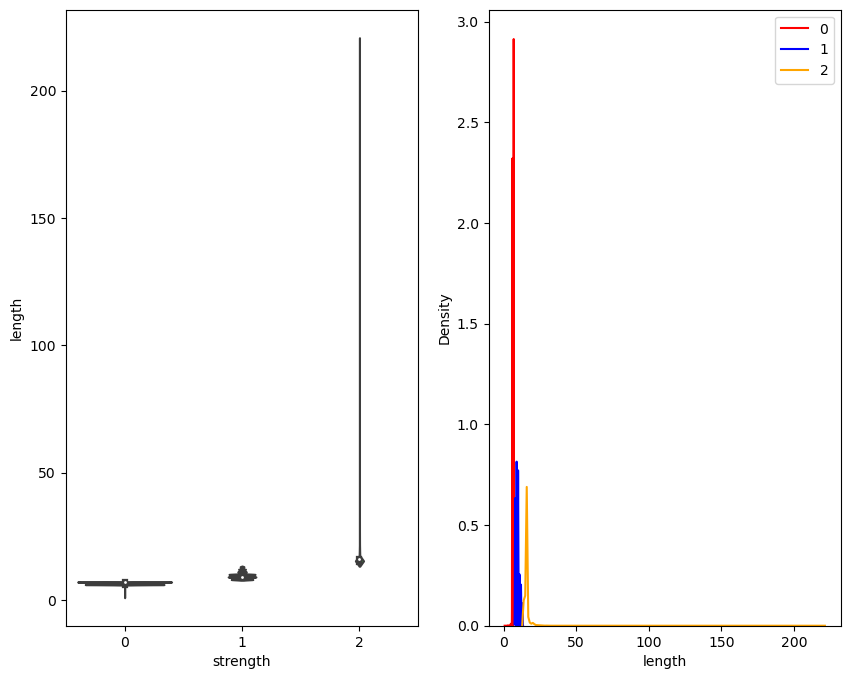

In [47]:
get_dist(df,'length')

#### Finding after using Violen Plot and Distribution Plot
1.   Overlap in Distribution and Violin Plots:

*    When the distribution of values across classes (like strength = 0, strength = 1, and strength = 2) shows minimal overlap, it implies that the feature values differ significantly across classes.
*    For example, if length shows distinct distributions for each class, it suggests that longer passwords tend to have higher strength, and shorter ones tend to have lower strength, with minimal overlap between classes.


2.  Length as an Interesting Feature
*   The observation that length has higher values for class 2 (strong passwords) compared to classes 1 and 0 (weaker passwords) suggests that length is strongly associated with password strength.
*   Because there’s less overlap in length values across strength classes, it means length is a useful indicator of strength; the distribution for each class is distinct enough to aid classification.

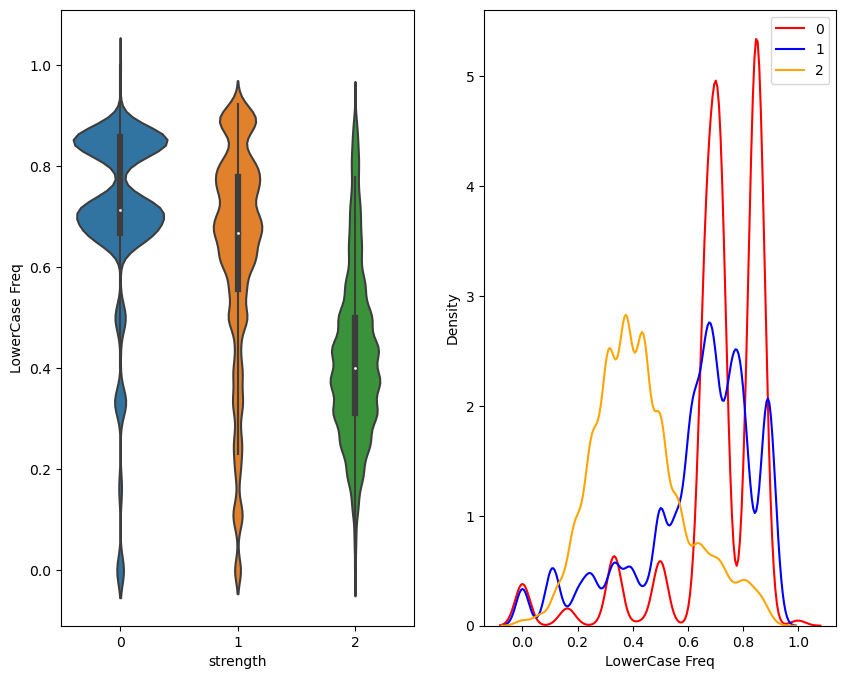

In [48]:
get_dist(df,'LowerCase Freq')

#### Finding after using Violen Plot and Distribution Plot
1.   Overlap in Distribution for lower_freq:

*    lower_freq (frequency of lowercase characters) shows some overlap between strength classes, which indicates that it's not as clear-cut in distinguishing strength levels as length might be.
*    Specifically, you observe that class 2 (stronger passwords) has a lower average lower_freq than classes 1 and 0. This suggests that stronger passwords tend to have a lower frequency of lowercase letters, likely due to the presence of other character types (uppercase, numeric, or special characters).


2.  Violin Plot Analysis:
*   This overlap suggests that lower_freq can contribute to identifying password strength, but because the distributions are not entirely distinct, lower_freq is moderately useful rather than a definitive predictor.

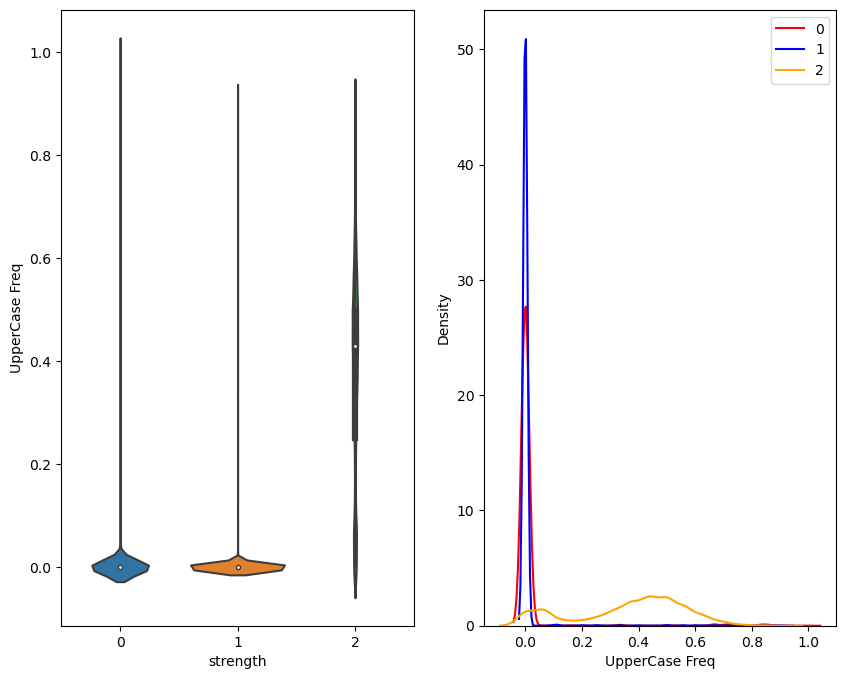

In [49]:
get_dist(df, "UpperCase Freq")

#### Finding after using Violen Plot and Distribution Plot
1.   High Overlap in upper_freq Distribution:

*   The distribution plot shows a significant overlap in upper_freq values across password strength classes (0, 1, and 2).
*    This high degree of overlap suggests that the presence of uppercase characters does not strongly differentiate between stronger and weaker passwords, as similar upper_freq values appear across different classes.



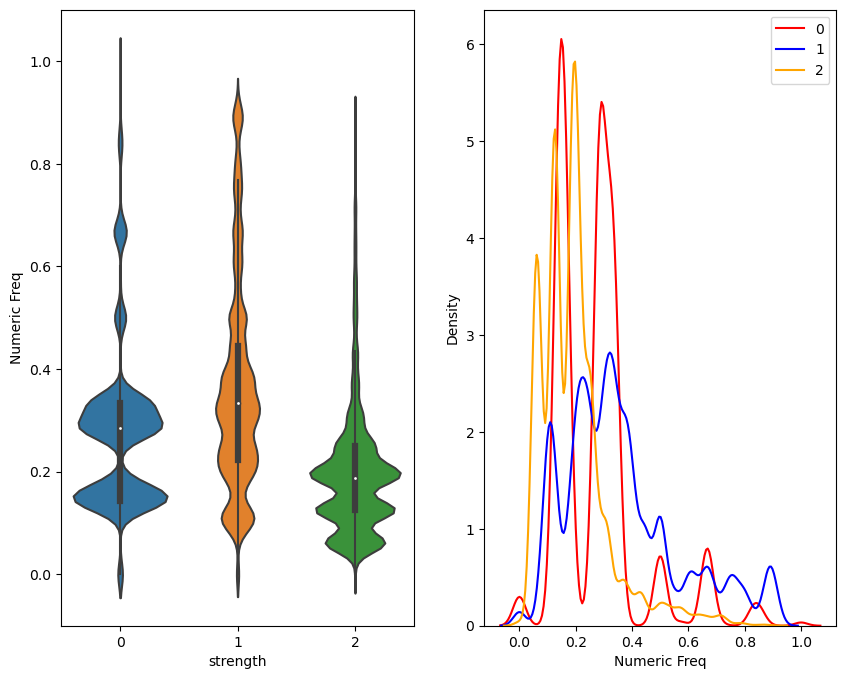

In [50]:
get_dist(df,"Numeric Freq")

#### Finding after using Violen Plot and Distribution Plot
1.   High Overlap in digit_freq Distribution:

* The distribution plot for digit_freq shows a significant overlap across different password strength classes (0, 1, and 2).
* This overlap implies that the presence or frequency of digits does not strongly distinguish password strength categories, as similar numeric frequencies are present across classes.

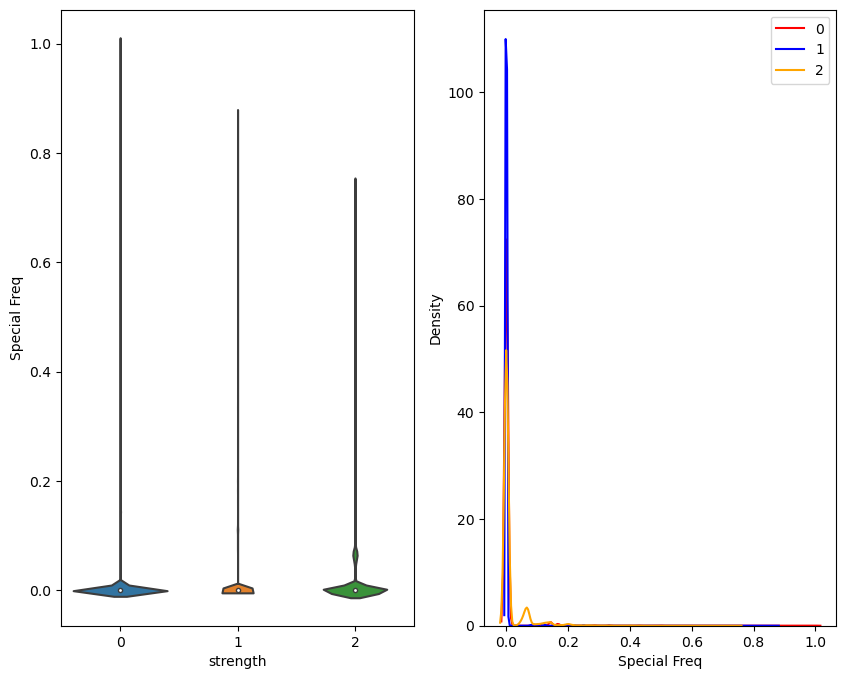

In [53]:
get_dist(df,"Special Freq" )

#### Finding after using Violen Plot and Distribution Plot
1.   High Overlap in Special Character Frequency Distribution:

* The distribution plot for digit_freq shows a significant overlap across different password strength classes (0, 1, and 2).
* This overlap implies that the presence or frequency of Special Character does not strongly distinguish password strength categories, as similar special character frequencies are present across classes.

#### Key Insights
*   It gives us idea that length & lowercase freq are important features

## Applying TF_IDF on data

In [55]:
dataframe = df.sample(frac=1)

In [56]:
dataframe.head()

,password,strength,length,LowerCase Freq,UpperCase Freq,Numeric Freq,Special Freq
68722,waditya1,1,8,0.875,0.000,0.125,0.0
67003,guille215,1,9,0.667,0.000,0.333,0.0
81017,kilv1003,1,8,0.500,0.000,0.500,0.0
62638,kaloqn132,1,9,0.667,0.000,0.333,0.0
94147,VZHDK5jcwMQuHqyM,2,16,0.375,0.562,0.062,0.0


In [57]:
x = list(dataframe["password"])

In [58]:
x

['waditya1',
 'guille215',
 'kilv1003',
 'kaloqn132',
 'VZHDK5jcwMQuHqyM',
 'kahraman007',
 'ar070201',
 'dxGoWwTQ3OQl6kob',
 'wy198656',
 'ludiqkon1201',
 'm2392536x',
 'evpcklgn38',
 'basedatos2',
 'MH6671',
 'ph022572',
 '444ppp',
 'richaid021099',
 'mauro02',
 'voazin01',
 'b20844',
 'E8KXTDTMzOQWbh88',
 '4y961o05',
 'ybileh750',
 '8bolo8',
 'hhfzvlw8ju',
 'yxijis621',
 'BRRIB4',
 'kaya50410',
 'vy143625',
 'mLsrnfjU2MAq7wQp',
 'cochi79',
 'blessing01',
 'qwert80',
 'aaypdp6',
 'Enissay997fcbarcelona997',
 'donovan280708',
 '12wd12wd',
 'supaplex2013',
 'funny18551',
 'ahmmzm123',
 '987654987A',
 'loveacdc863',
 'ixyxudy789',
 'orbitum-terra@971',
 'zopiv315',
 'x0Y4C0Dk2OAIcsEH',
 'new123123',
 'mba03040612',
 'yog@pamungkas',
 'gukaguka7',
 'vfrcbv123',
 'se75330749',
 'y9WIMOTI2MQiJlin',
 'islamku1',
 'ywowo217',
 'maricar13',
 'Ibrahim@Ibnawad159753',
 'harshpreet909',
 'ch18a10n7',
 'wappa1023',
 'ynayds3',
 '033oFYHERyPavUS',
 'ariqyl449',
 'kingdon99',
 'on4L97zI2OAx9Of2',
 

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [62]:
vectorizer = TfidfVectorizer(analyzer = "char")

In [63]:
X = vectorizer.fit_transform(x)

In [64]:
X


<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [65]:
X.shape

(100000, 99)

In [66]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [68]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [69]:
df2


,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning Algorithm (Logistic Regression)


In [74]:
df2["length"] = dataframe["length"]

In [72]:
dataframe.columns

Index(['password', 'strength', 'length', 'LowerCase Freq', 'UpperCase Freq',
       'Numeric Freq', 'Special Freq'],
      dtype='object')

In [76]:
df2['LowerCase Freq'] = dataframe['LowerCase Freq']

In [77]:
df2.head()

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,LowerCase Freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625


In [79]:
y = dataframe["strength"]

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(df2, y,test_size=0.2, random_state=42 )

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
Logistic_reg_model = LogisticRegression(multi_class = "multinomial")

In [84]:
Logistic_reg_model.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [85]:
y_pred = Logistic_reg_model.predict(X_test)

In [88]:
from collections import Counter

Counter(y_pred)

# Automation (Predicting User Input)

In [108]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = Logistic_reg_model.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [109]:
predict()

Enter a password : dfkahsdlghals


'Password is normal'

# Model Performance

In [112]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [113]:
accuracy_score(Y_test , y_pred)

0.79285

In [114]:
confusion_matrix(Y_test , y_pred)

array([[  495,  2216,     5],
       [  405, 14041,   344],
       [   85,  1088,  1321]], dtype=int64)

In [116]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.50      0.18      0.27      2716
           1       0.81      0.95      0.87     14790
           2       0.79      0.53      0.63      2494

    accuracy                           0.79     20000
   macro avg       0.70      0.55      0.59     20000
weighted avg       0.77      0.79      0.76     20000



*   Overall Accuracy:

The model achieved an accuracy score of approximately 79.3%. This means that about 79% of the predictions on the test set are correct.
While this is a good accuracy score, accuracy alone may not be a complete measure, especially when classes are imbalanced.
*  Class-wise Performance (Precision, Recall, F1-score):

Class 0 (Lowest Strength)

Precision: 0.50, indicating that of all predictions made as "0" (low strength), only 50% were actually low strength.
Recall: 0.18, indicating that only 18% of all actual "0" class instances were correctly identified by the model.
F1-score: 0.27, which is quite low, suggesting the model struggles to identify low-strength passwords.


Class 1 (Medium Strength):

Precision: 0.81, which is reasonably high.
Recall: 0.95, meaning the model captures most of the true "1" instances.
F1-score: 0.87, showing a strong performance in identifying medium-strength passwords.


Class 2 (High Strength):

Precision: 0.79, showing that most high-strength predictions are accurate.
Recall: 0.53, indicating that the model correctly identifies only 53% of actual "2" instances.
F1-score: 0.63, suggesting that the model performs moderately well in identifying high-strength passwords but has room for improvement.
*   Class Imbalance:

The largest class is "1" (medium strength), while classes "0" and "2" are much smaller.
The model seems biased towards the majority class (class 1), as seen by its high recall and precision for class 1.
This imbalance might cause the model to favor predicting medium strength over low or high strength, especially if it helps achieve a higher accuracy.
*   Confusion Matrix Insights:

Class 0 Misclassification: The model struggles with class 0, often misclassifying it as class 1 (with 2,216 instances of misclassification).
Class 2 Misclassification: Many high-strength passwords (class 2) are also misclassified as class 1, with 1,088 instances in this category.
*   Macro and Weighted Averages:

The macro average F1-score is lower (0.59) because it equally averages performance across all classes, showing that the model doesn’t perform equally well on each class.
The weighted average F1-score is higher (0.76) due to the high performance in class 1, which dominates the dataset.